# Logistic Regression

심장병은 국내 사망원인 2위에 해당되며 급성 심장질환같은 경우에는 즉시 치료를 한다 하여도 

치사율이 30~40%에 달할 정도로 위험한 질병이다.

따라서 실제 어느 요소들이 심장병과 관련이 있는지 분석하고 추후 심장병이 발생할 수 있는 사람들을 예측하는 모델을 만들고자 'Heart Disease' data set을 이용하여 Logistic Regression을 진행하고

 그 결과를 해석하고자 한다.

 데이터셋은 다음 사이트에서 가져왔다.

 https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction



Logistic Regression을 진행하기 위해서는 

1.관측치들 간 독립성

2.잔차 간 등분산성

3.독립 변수와 log odds 간의 linearity 

4.이상치가 존재하지 않아야 함

위 4가지 Assumption을 만족해야 한다. 데이터 전처리 과정 및 EDA를 통하여 

Assumption의 만족 여부를 확인한다.

##Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/Shareddrives/데마 팀플 2/HW6/heart.csv')   #데이터셋 불러오기

Attribute Information

Age (나이): age of the patient [years]

Sex (성별): sex of the patient [M: Male, F: Female]

ChestPainType (가슴 고통 종류): chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP (휴식상태의 혈압): resting blood pressure [mm Hg]

Cholesterol (콜레스테롤): serum cholesterol [mm/dl]

FastingBS (혈당): fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG (휴식상태의 심전도): resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR (최대심장박동): maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina (협심증 유무): exercise-induced angina [Y: Yes, N: No]

Oldpeak (비교적 안정되기까지 운동으로 유발되는 ST depression): oldpeak = ST [Numeric value measured in depression]

ST_Slope (최대 운동 ST segment의 기울기): the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease (심장병 유무): output class [1: heart disease, 0: Normal]

In [ ]:
df.shape

(918, 12)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


FastingBS 데이터의 경우 실제로는 Binary한 Categorical 변수이기 때문에 Categorical 변수로 바꿔준다

In [ ]:
df.loc[df['FastingBS'] == 1, 'FastingBS'] = 'High'
df.loc[df['FastingBS'] == 0, 'FastingBS'] = 'Low'

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Low,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Low,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,Low,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Low,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Low,Normal,122,N,0.0,Up,0


데이터는 반복적으로 측정한 것이 아닌 개별 환자들의 진료 기록이기 때문에 

첫번째 Assumption인 관측치들간 독립성을 만족한다.   

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

결측치는 없기 때문에 Imputation을 진행하지 않는다.

## EDA

https://www.kaggle.com/code/kgxiao/eda-logistic-regression-recall-rate-91

https://www.kaggle.com/code/mohamedabidi97/exploratory-data-analysis-heart-disease

강의 시간에 진행한 EDA 코드 뿐만 아니라 

추가 EDA 확인을 위하여 kaggle에 있는 코드를 참고하였습니다

-Numeical Data

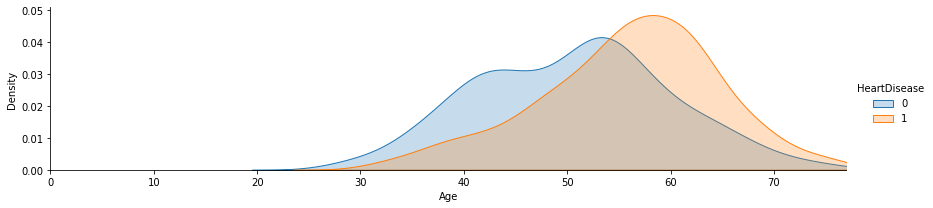

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()



Age에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 구분되어 있지 않고 혼재되어 나타나있음을 알 수 있다. 

데이터셋의 Age가   20대 이상이며 주로 40~60대 임을 알 수 있었다.

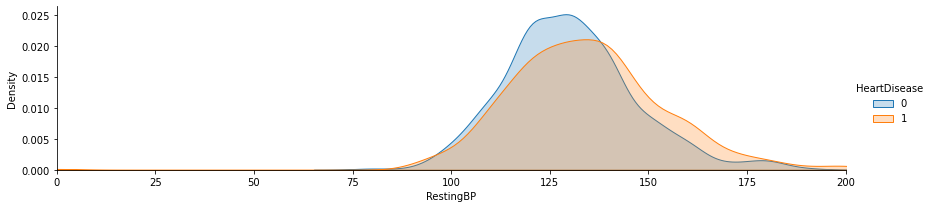

In [ ]:
facet2 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet2.map(sns.kdeplot, 'RestingBP', shade=True)
facet2.set(xlim=(0, df['RestingBP'].max()))
facet2.add_legend()

plt.show() 

RestingBP에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 구분되어 있지 않고 혼재되어 나타나있음을 알 수 있다. 

데이터셋의 RestingBP가 75 이상이며 주로 125~150 임을 알 수 있었다.

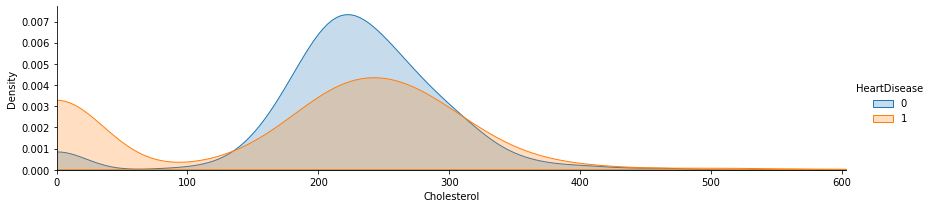

In [ ]:
facet3 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet3.map(sns.kdeplot, 'Cholesterol', shade=True)
facet3.set(xlim=(0, df['Cholesterol'].max()))
facet3.add_legend()

plt.show()

Cholesterol에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

Cholesterol의 수치가 100이하로 많이 낮을 경우, 300이상으로 높을경우 HeartDisease가 발병한 경우가 많았으며

데이터셋의 Cholesterol이 주로 200~300 임을 알 수 있었다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


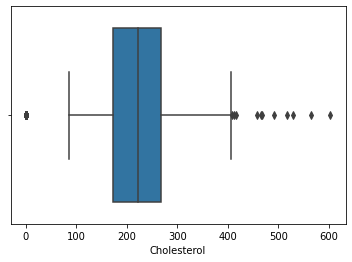

In [ ]:
sns.boxplot(df['Cholesterol'])

In [ ]:
df.loc[df['Cholesterol'] >= 400, 'Cholesterol'] = 400

Cholesterol이 일정 수준 이상부터는 그 데이터수가 확연하게 적기 때문에


400이상의 수치를 같은 값으로 동일하게 바꾼다 (이상치 제거의 과정)


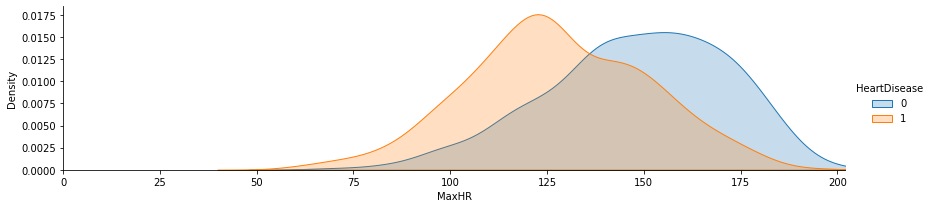

In [ ]:
facet4 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet4.map(sns.kdeplot, 'MaxHR', shade=True)
facet4.set(xlim=(0, df['MaxHR'].max()))
facet4.add_legend()


MaxHR에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

빨강색(발병)과 파랑색(정상)이 잘 구분되어 있지 않고 혼재되어 나타난다. 

데이터셋의 MaxHR이 50 이상이며 주로 125~150 임을 알 수 있었다.

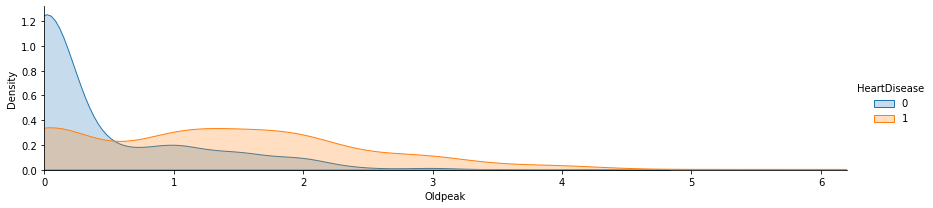

In [ ]:
facet5 = sns.FacetGrid(df, hue="HeartDisease", aspect=4)
facet5.map(sns.kdeplot, 'Oldpeak', shade=True)
facet5.set(xlim=(0, df['Oldpeak'].max()))
facet5.add_legend()

Oldpeak에 따른 HeartDisease의 발병유무를 Plot으로 확인할 수 있다.

Oldpeak가 낮을 때 정상인 경우(파랑색)가 발병할 경우보다 확연하게  많았다

Oldpeak가 2보다 커질경우 발병하는 경우는 거의 없었으며 대부분의 데이터의 Oldpeak가 4 이하였다 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


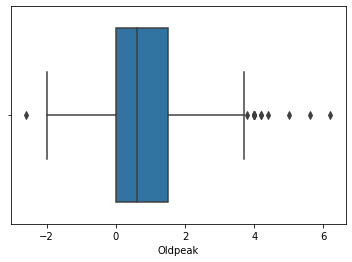

In [ ]:
sns.boxplot(df['Oldpeak'])

In [ ]:
df.loc[df['Oldpeak'] >= 4, 'Oldpeak'] = 4

Oldpeak의 경우  일정수준 이상부터는 그 데이터수가 확연히 적기 때문에 

4이상의 수치를 같은 값으로 동일하게 바꾼다 (이상치 제거의 과정)


5개의 Numerical 변수들 중 Plot을 통해 HeartDisease와 관계가 있을 것으로 예상되는 변수들은

'Cholesterol' 과 'Oldpeak'이다

'Age', 'RestingBP','MaxHR'의 경우 크기에 상관없이 HeartDisease의 발생수가 비슷하게 나타남으로 고려하지 않았다 

(결과가 궁금하여 따로 분석을 진행해보았지만 세 변수 모두 P-value가 0.05 이상으로로 유의미 하지 않았다)

In [ ]:
df['Cholesterol'].describe()

count    918.000000
mean     197.769063
std      106.854935
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      400.000000
Name: Cholesterol, dtype: float64

In [ ]:
df['Oldpeak'].describe()

count    918.000000
mean       0.881264
std        1.044076
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        4.000000
Name: Oldpeak, dtype: float64

-Categorical Data

In [ ]:
# 특정 feature에 따른 HeartDisease 비교 (0: 발병x, 1: 발병) 함수
def bar_chart(feature):
    survived = df[df['HeartDisease']==1][feature].value_counts()
    dead = df[df['HeartDisease']==0][feature].value_counts()
    df_survived = pd.DataFrame([survived,dead])
    df_survived.index = ['HeartDisease','Normal']
    df_survived.plot(kind='bar',stacked=True, figsize=(10,5))

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

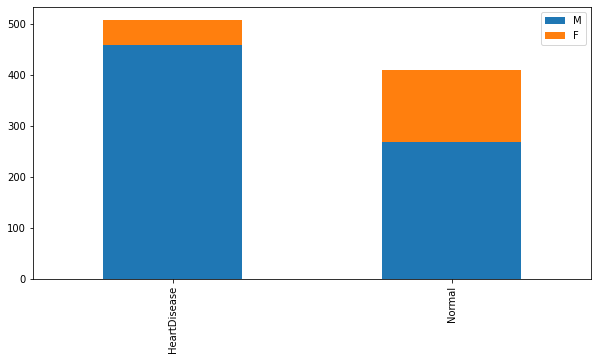

In [ ]:
bar_chart('Sex')
df.groupby(['Sex'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

실제 남성이 여성보다 데이터 수가 많았지만, Normal에서의 비율 차이보다 HeartDisease에서의 남성 비율이 높기 때문에

남성이 HeartDisease 발생이 여성보다 많다고 해석할 수 있다.

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64

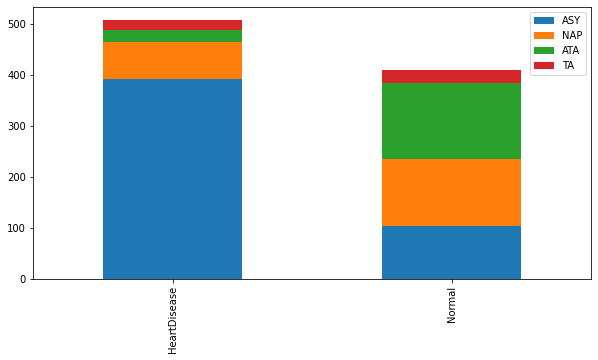

In [ ]:
bar_chart('ChestPainType')
df.groupby(['ChestPainType'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ChestPainType의 경우 ASY일 때 HeartDisease의 발병비율이 매우 높은것 을 알 수 있었으며

ATA일때 HeartDisease의 발병비율이 매우 낮은 것을 알 수 있었다.

FastingBS
High    0.794393
Low     0.480114
Name: HeartDisease, dtype: float64

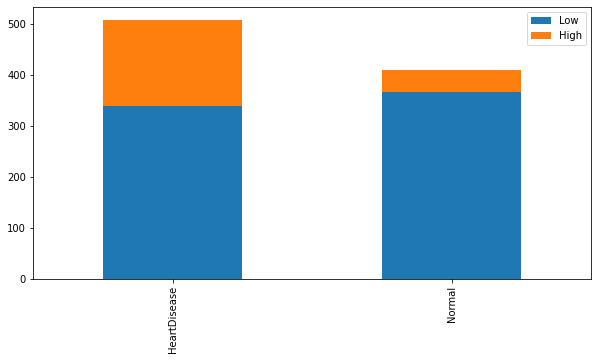

In [ ]:
bar_chart('FastingBS')
df.groupby(['FastingBS'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

FastingBS가 High일 경우 HeartDisease가 발병했을 때와 정상인 경우를 비교해봤을 때 

발병했을 때의 데이터가 훨씬 많았음을 알 수 있었다.

RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64

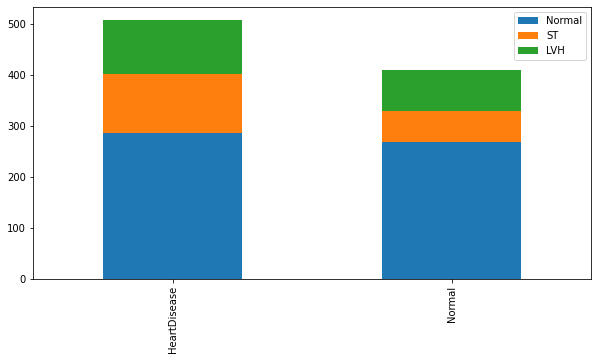

In [ ]:
bar_chart('RestingECG')
df.groupby(['RestingECG'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

RestingECG가  Normal,ST,LVH일때의 비율이 HeartDisease가 발병했을 때와 정상일 때 차이가 거의 없음을 알 수 있었다.

ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64

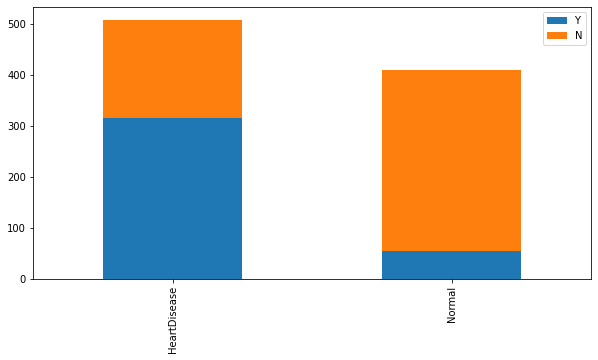

In [ ]:
bar_chart('ExerciseAngina')
df.groupby(['ExerciseAngina'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ExerciseAngina의 경우 HeartDisease의 발병했을때와 정상일 때를 비교하면 

ExerciseAngina가 있을 경우 발병한 데이터가 훨씬 많음을 알 수 있었다.

ST_Slope
Down    0.777778
Flat    0.828261
Up      0.197468
Name: HeartDisease, dtype: float64

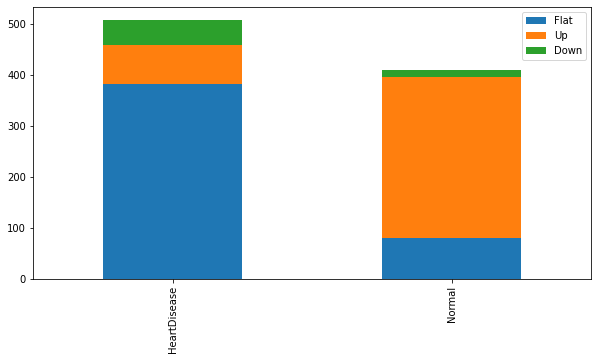

In [ ]:
bar_chart('ST_Slope')
df.groupby(['ST_Slope'])['HeartDisease'].agg(lambda x: x.sum()/x.count())

ST_Slope의 경우 Flat한 경우 HeartDisease가 발병한 데이터가 많음을 알 수 있었으며 

Up인 경우 HeartDisease가 발병할 경우보다 정상인 경우가 많음을 알 수 있었고

Down인 경우 HeartDisease가 발병할 경우가 정상인 경우와 비교해봤을때 많은 것을 알 수 있었다.

*추가 EDA

Kaggle에 있는 코드를 참고하여 데이터분포 및 데이터간 Plot을 보다 이해하기 쉽게 확인해보았다.

In [ ]:
#Minors, young people, middle-aged people, middle-aged and old people, old people————Five levels
dfage = df.assign(box_age=pd.cut(df["Age"],
                         bins=[0,18,30,45,55,100])).loc[:,["box_age","HeartDisease"]].assign(count_pointer=1).groupby(["box_age","HeartDisease"]).agg(count_num=("count_pointer","count"))
dfage = dfage.reset_index()
dfage

,box_age,HeartDisease,count_num
0,"(0, 18]",0,0
1,"(0, 18]",1,0
2,"(18, 30]",0,5
3,"(18, 30]",1,0
4,"(30, 45]",0,130
5,"(30, 45]",1,61
6,"(45, 55]",0,156
7,"(45, 55]",1,160
8,"(55, 100]",0,119
9,"(55, 100]",1,287


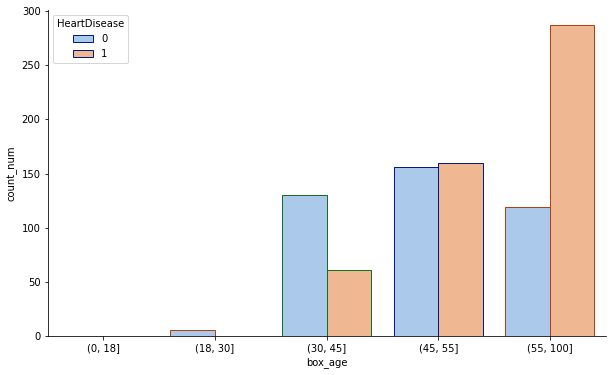

In [ ]:
plt.figure(figsize=(10,6))
fig =sns.barplot(x=dfage["box_age"],y=dfage["count_num"],hue=dfage["HeartDisease"],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

Age의 구간별 HeartDisease 발병유무 데이터수를 확인할 수 있었다.

Age는 대부분의 데이터가 30 이상이었으며 HeartDisease가 발병한 데이터의 대부분은 Age가 45 이상이었다



In [ ]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
dfchest = df.assign(chest=1).loc[:,["ChestPainType","HeartDisease","chest"]].groupby(["ChestPainType","HeartDisease"]).agg(count_num=("chest","sum")).reset_index()
dfchest

,ChestPainType,HeartDisease,count_num
0,ASY,0,104
1,ASY,1,392
2,ATA,0,149
3,ATA,1,24
4,NAP,0,131
5,NAP,1,72
6,TA,0,26
7,TA,1,20


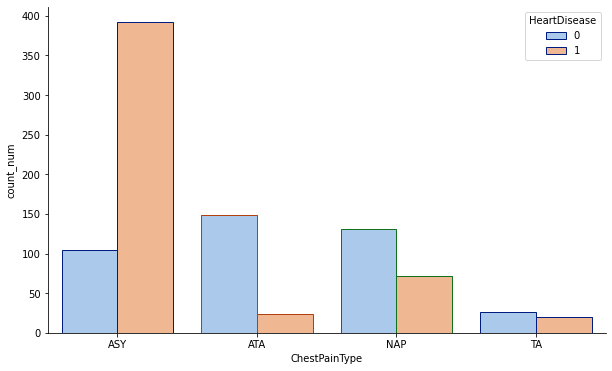

In [ ]:
plt.figure(figsize=(10,6))
fig =sns.barplot(x=dfchest["ChestPainType"],y=dfchest["count_num"],hue=dfchest["HeartDisease"],palette=sns.color_palette("pastel"),edgecolor=sns.color_palette("dark", 3))
sns.despine()

ChestPainType의 유형별 HeartDisease 발병유무 데이터수를 확인할 수 있었다.

ASY일 경우 HeartDisease가 발생할 확률이 훨씬 높았으며

ATA일 경우 HeartDisear가 발생할 확률이 훨씬 낮았다.

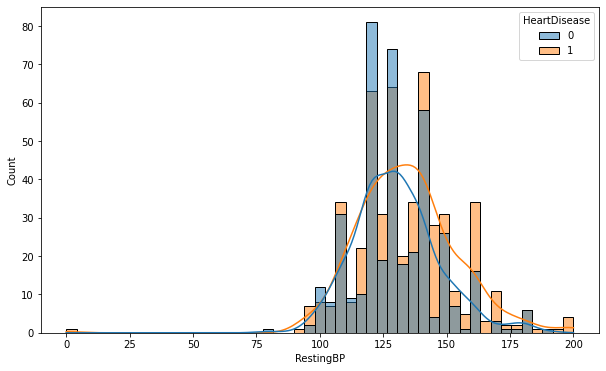

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="RestingBP",kde=True,hue="HeartDisease",color="r")
#회색 의미가 ??#

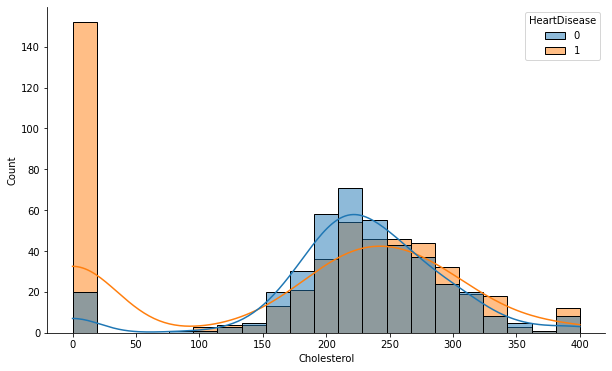

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Cholesterol",kde=True,hue="HeartDisease")
sns.despine()

6개의 Categorical 변수들 중 Plot을 통해 HeartDisease와 관계가 있을 것으로 예상되는 변수들은

'Sex','ChestPainType','FastingBS','ExerciseAngina','ST_Slope'이다

RestingECG가의 경우 세 가지 유형모두 발병비율과 발병하지 않을 비율이 비슷하게 나타남으로 고려하지 않았다 

(결과가 궁금하여 따로 분석을 진행해보았지만 RestingECG의 경우 P-value가 0.05 이상으로로 유의미 하지 않았다)

따라서 
'Cholesterol', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope' 의 7가지 column을 

유의미하다고 보고 분석을 진행한다.

In [ ]:
df=df[[ 'Cholesterol', 'Oldpeak', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope','HeartDisease']]

In [ ]:
df = pd.get_dummies(df, columns = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [ ]:
df

,Cholesterol,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_Low,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,289,0.0,0,1,1,0,0,1,0,0,1
1,180,1.0,1,0,0,1,0,1,0,1,0
2,283,0.0,0,1,1,0,0,1,0,0,1
3,214,1.5,1,0,0,0,0,1,1,1,0
4,195,0.0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,264,1.2,1,1,0,0,1,1,0,1,0
914,193,3.4,1,1,0,0,0,0,0,1,0
915,131,1.2,1,1,0,0,0,1,1,1,0
916,236,0.0,1,0,1,0,0,1,0,1,0


Sex- Female = True

ChestPainType - ASY= True

FastingBS -High = True

ExerciseAngina- N = True

ST_Slope- Down= True 

(두 변수간 Correlation=1이 되는 것을 방지)

변수들을 증가시켰으므로 다중공선성 문제가 발생했는지 확인한다.

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.drop(['HeartDisease'], axis = 1, inplace = True)
df_copy

,Cholesterol,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_Low,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,289,0.0,1,1,0,0,1,0,0,1
1,180,1.0,0,0,1,0,1,0,1,0
2,283,0.0,1,1,0,0,1,0,0,1
3,214,1.5,0,0,0,0,1,1,1,0
4,195,0.0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
913,264,1.2,1,0,0,1,1,0,1,0
914,193,3.4,1,0,0,0,0,0,1,0
915,131,1.2,1,0,0,0,1,1,1,0
916,236,0.0,0,1,0,0,1,0,1,0


In [ ]:
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df_copy)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Cholesterol,4.858385
1,Oldpeak,2.282342
2,Sex_M,4.198706
3,ChestPainType_ATA,1.758068
4,ChestPainType_NAP,1.527696
5,ChestPainType_TA,1.141126
6,FastingBS_Low,4.583115
7,ExerciseAngina_Y,2.477439
8,ST_Slope_Flat,4.653658
9,ST_Slope_Up,4.840092


VIF가 5를 초과하는 값이 없으므로 다중공산성 문제가 발생하지 않았음을 확인하였다.

다중공선성이 있다는 것은 변수들 간의 상관관계가 높다는 것을 의미한다. 다중공선성이 높으면 예측 값의 신뢰구간이 넓게 형성되는 현상이 발생한다.

다중공선성을 판단하는 지표로 사용하는 것이 VIF로 각 변수마다 10 이상인 경우 다중공선성이 있다고 판단한다. 엄격한 경우에는 기준을 5로 두기도 한다.

https://muzukphysics.tistory.com/entry/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1-%ED%8C%90%EB%8B%A8-%EA%B8%B0%EC%A4%80-%EB%B0%8F-%ED%95%B4%EA%B2%B0-%EB%B0%A9%EB%B2%95-VIF-%ED%99%95%EC%9D%B8-Multicollinearity

## Logistic Regression

https://www.kaggle.com/code/kgxiao/eda-logistic-regression-recall-rate-91

전처리한 DataSet을 가지고 Logistic Regression을 진행한다.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import recall_score,roc_curve,roc_auc_score,plot_confusion_matrix

In [ ]:
df

,Cholesterol,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_Low,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,289,0.0,0,1,1,0,0,1,0,0,1
1,180,1.0,1,0,0,1,0,1,0,1,0
2,283,0.0,0,1,1,0,0,1,0,0,1
3,214,1.5,1,0,0,0,0,1,1,1,0
4,195,0.0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,264,1.2,1,1,0,0,1,1,0,1,0
914,193,3.4,1,1,0,0,0,0,0,1,0
915,131,1.2,1,1,0,0,0,1,1,1,0
916,236,0.0,1,0,1,0,0,1,0,1,0


In [ ]:
df.columns

Index(['Cholesterol', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_Low',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
train_target = df["HeartDisease"]
train_features = df.drop(columns=["HeartDisease"])
train_target = train_target.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (587, 10)
valid set: (147, 10)
test set: (184, 10)


In [ ]:
y_train.value_counts() # 0: 정상, 1: 발병

1    321
0    266
Name: HeartDisease, dtype: int64

target Data가 정상인경우와 발병했을 때의 데이터의 차이가 존재하긴 하지만 

그 차이가 크지 않기 때문에 RandomUnderSampling을 하여 분석을 진행한다.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
x_train, y_train = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts() # 0: 정상, 1:발병

0    266
1    266
Name: HeartDisease, dtype: int64

In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_valid = sm.add_constant(x_valid)
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_sm = sm.Logit(y_train, x_train).fit()
# model_sm = smf.logit("y 변수명 ~ X변수1 + X변수2", data=데이터프레임).fit()의 형태로도 fit 가능

Optimization terminated successfully.
         Current function value: 0.346579
         Iterations 7


Logistic Regression 을 위한 Maximumlikelihood estimation에서 loss function이 최소가 되게 하는  Iteration이 7번임을 알 수 있었다.

## Evaluation

###Assumption


먼저 진행한 Logistic Regression이 Assumption들을 만족하는지 파악하고자 한다.

1.관측치들 간 독립성

2.잔차 간 등분산성

3.독립 변수와 log odds 간의 linearity 

4.이상치가 존재하지 않아야 함

4가지 Assumption중 1번인 '관측치들간 독립성',4번인 '이상치가 존재하지 않아야 함' 의 경우

데이터가 개별 환자들의 기록이기 때문에 관측치들 간 독립성이 보장되고

전처리 과정에서 'Cholesterol','Oldpeak'의 이상치를 제거해주었기 때문에 만족시킨다 


-잔차 간 등분산성 검정 

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Probability 값
predict_prob = model_sm.predict(x_valid)

In [ ]:
y_valid.shape


(147,)

예측값과 잔차를 비교하여 잔차의 추세가 0을 기준으로한 수평선과 비슷할 경우 잔차간 등분산성을 만족한다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


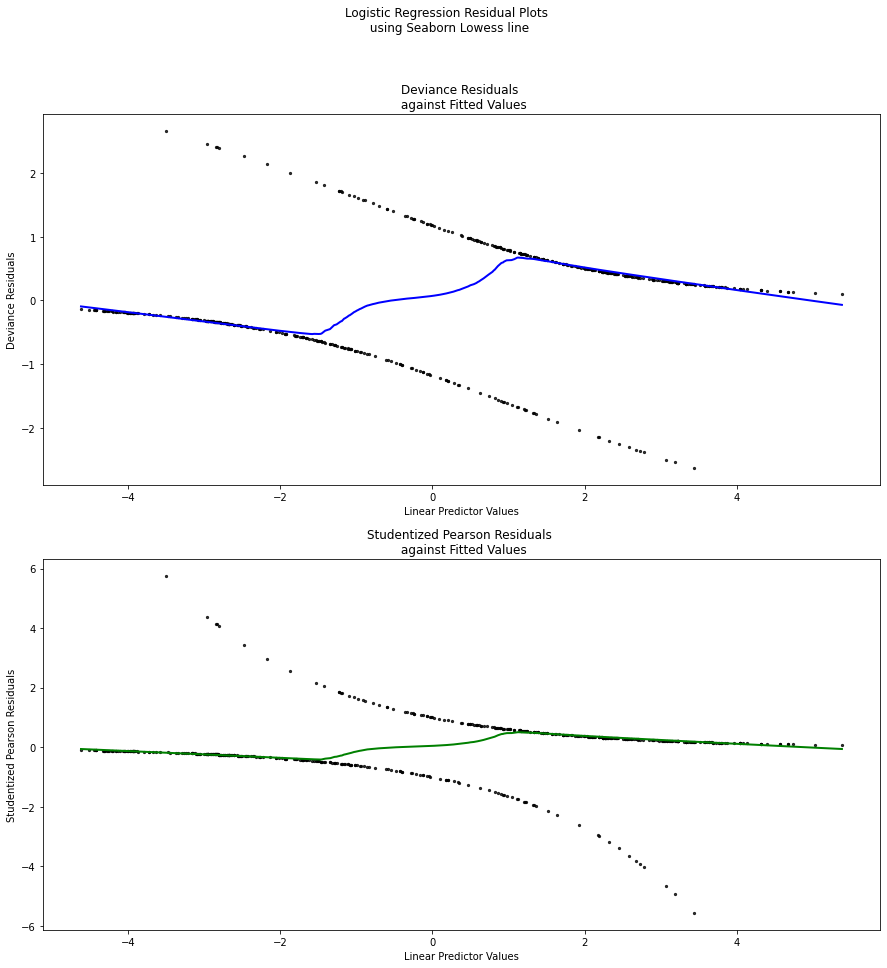

In [ ]:
# Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line")

# Deviance Residuals
sns.regplot(model_sm.fittedvalues, model_sm.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(model_sm.fittedvalues, model_sm.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

플롯이 0절편을 기준으로 어느정도의 수평선을 가지면 잔차 간 등분산성(특정한 패턴을 가지지 않고 분포되어있다)을 가진다고 할 수 있다.

Deviance Residuals와 Studentized Pearson Residuals 모두 대략적인 수평선을 가지므로 모델 적합함을 알 수 있고 잔차간 등분산성 가정을 만족시킴을 알 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


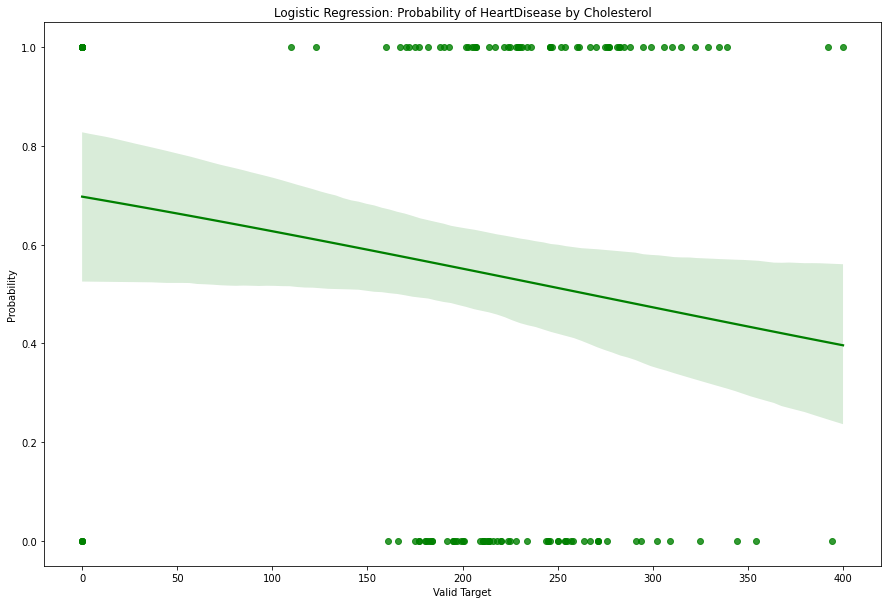

In [ ]:
def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(15,10))
    sns.regplot(ap_X, ap_y, logistic=True, color='green')
    return None

ap_log_regplot(x_valid['Cholesterol'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of HeartDisease by Cholesterol')
plt.show()

Logistic Regression을 이용하여 Cholesterol에 따른 HearDisease의 발병을  추정한 결과를 플롯으로 알 수 있었고 

그 추정그래프와 잔차를 표현하여 추정그래프와 큰 차이를 보이지 않고 잔차가 나타났기 때문에 적합하게 모델링 되었다고 할 수 있다. 

잔차간 등분산성을 만족한다고 할 수 있다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


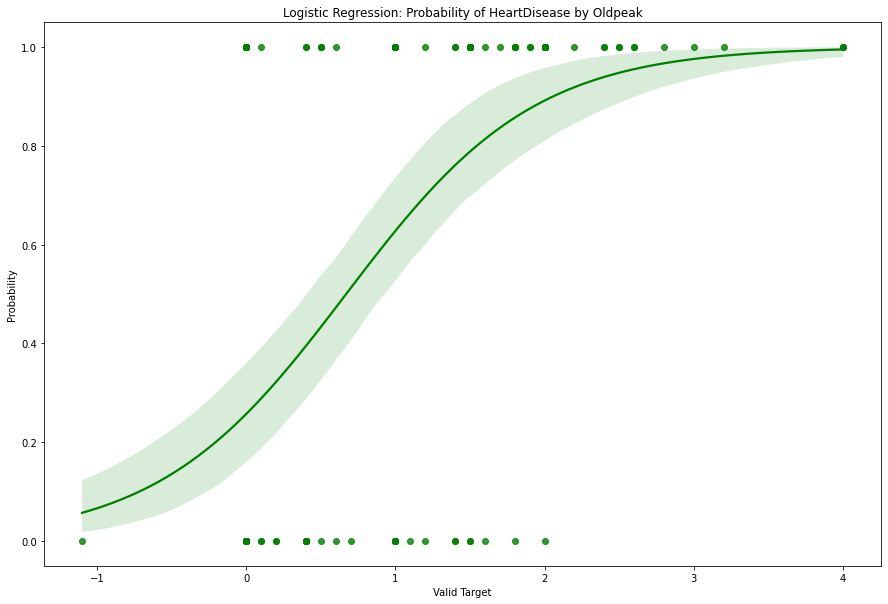

In [ ]:
def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(15,10))
    sns.regplot(ap_X, ap_y, logistic=True, color='green')
    return None

ap_log_regplot(x_valid['Oldpeak'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of HeartDisease by Oldpeak')
plt.show()

Logistic Regression을 이용하여 Oldpeak에 따른 HearDisease의 발병을  추정한 결과를 S자 곡선 플롯으로 알 수 있었고 그 S자 곡선과 잔차를 표현하여 S자 곡선과 큰 차이를 보이지 않고 잔차가 나타난다면 적합하게 모델링 되었다고 할 수 있고

잔차간 등분산성을 만족한다고 할 수 있다.

-독립 변수와 log odds 간의 linearity 

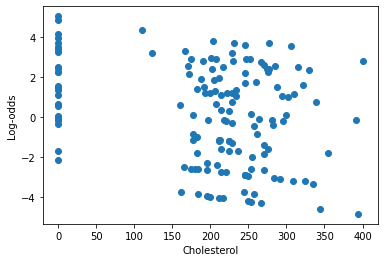

In [ ]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=x_valid['Cholesterol'].values, y=log_odds)
plt.xlabel("Cholesterol")
plt.ylabel("Log-odds")
plt.show()

Cholesterol의 수치가 낮을 때 Log-Odds(발병하지 않을 확률 대비 발병할 확률) 이높고 

Cholesterol의 수치가 클 때 Log-Odds가 낮으므로

선형성 가정을 충족한다.

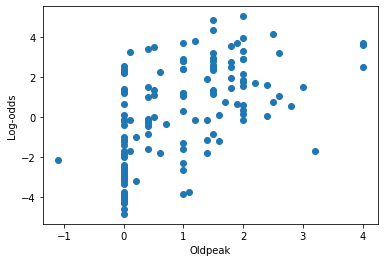

In [ ]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# Visualize predictor variable vs logit values for Age
plt.scatter(x=x_valid['Oldpeak'].values, y=log_odds)
plt.xlabel("Oldpeak")
plt.ylabel("Log-odds")
plt.show()

Oldpeak의 수치가 낮을 때 Log-Odds(발병하지 않을 확률 대비 발병할 확률)가 낮고 

Oldpeak의  수치가 클 때 Log-Odds가 높으기 때문에

선형성 가정을 충족한다.

따라서 Logistic Regression의 4가지 Assumption을 모두 충족한다

###Cut-off 설정

Sigmoid function이 0~1의 값을 갖기 때문에 그 사이의 적절한 cut-off를 설정한다

이때, Accuracy가 높게 나오도록 Cut-off를 설정하도록 한다.

In [ ]:
# 경계값cut off value에 따라 0,1 값 변환
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [ ]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.3)))
print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.3)))
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.3)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.3)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.3)))

[[48 18]
 [ 5 76]]
 Accuracy: 0.8435374149659864
Precision: 0.8085106382978723
   Recall: 0.9382716049382716
 F1 score: 0.8685714285714285


In [ ]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.7)))
print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.7)))
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.7)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.7)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.7)))

[[58  8]
 [23 58]]
 Accuracy: 0.7891156462585034
Precision: 0.8787878787878788
   Recall: 0.7160493827160493
 F1 score: 0.7891156462585033


In [ ]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.5)))
print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.5)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.5)))

[[57  9]
 [11 70]]
 Accuracy: 0.8639455782312925
Precision: 0.8860759493670886
   Recall: 0.8641975308641975
 F1 score: 0.8749999999999999


Accuracy가 가장 높게 나오는 Cut-off 는 0.5이므로 Cut-off=0.5 이다 

( Target Data가 불균형하지 않기 때문에 F1 Score가 아닌 Accuracy가 높게 나오도록 Cut-off 설정, F1-Score대신 Accuracy만 고려하여 평가한다)

세 성능 지표중 가장 중요한 것은 Accuray이다. 심장 질환과 같은 가볍지 않은 질병의 경우 정상일 때 발병이라고 판단하거나 ,발병햇을때 정상이라고 판단하는 것 모두 치명적이다. 전자의 경우 환자에게 큰 스트레스 및 병원비가 사용될 수 있고, 후자의 경우는 질환의 조기치료를 놓치고 건강악화의 위험이 발생할 수 있기 때문이다.

Accuracy는 약 86퍼센트이다. 이는 Logistic Regression을 이용하여 HeartDisease의 발병을 추정했을때 총 147건의 추정중 127건을 정확히 추정하였기 때문에 Logisic Regression의 정확도가 127/147= 약 86퍼센트 인것이다. 질병을 판단하는 모델의 경우 그 정확도가 90퍼센트이상은 되어야 적합하다고 생각된다. 따라서 86퍼센트의 정확도를 가지는 이 선형모델은 일반적으로는 정확도가 높다고 생각할 수 있지만 실제로 사용하기에는 조금 부족하다고 해석된다.

두 번째로 중요한 지표는 Recall이다. 질병의 경우 실제 환자가 발병했을 때 그 병을 정확히 진단해야 하며 만약 그 병을 정상이라 진단할 경우 조기치료가 중요한 심장 질환의 경우 그 판단이 치명적일 수 있기 때문이다.

Recall은 약 88퍼센트이다. 이는 Logistic Regression을 이용하여 HeartDisease가 실제로 발생한 경우 중 실제로 model이 발병했다고 추정한 비율이다. 총 81건의 실제 발병한 경우 중 70건을 정확히 추정하였기 때문에 Logisic Regression의 재현도가 70/81= 약 86퍼센트 인것이다. Recall의 경우도 Accuracy와 같이 일반적으로는 높다고 판단되나, 질병의 판단에 사용되기 때문에 조금 부족하다고 해석된다.

세 번째로 중요한 지표는 Precision이다. 질병의 경우 모델이 발병했다고 판단했을 때 실제로 발병해야 할 확률 역시 중요하다.물론 실제로 발병하지 않았을 경우 환자가 정상이라는 것이기 때문에 Recall 보다는 중요하진 않지만, 환자의 스트레스 및 추가로 사용될 수 있는 병원비들을 고려할때, Precision 역시 중요하다.

Precision은 약 86퍼센트이다. 이는 Logistic Regression을 이용하여 모델이 HeartDisease가 발생했다고 추정한 경우 중 실제로 발병한 비율이다. 총 79건의 발병했다고 추정한 경우 중 70건이 실제로 발병하였기 때문에 Logisic Regression의 정밀도가 70/79= 약 86퍼센트 인것이다. Precision의 경우도 Accuracy와 같이 일반적으로는 높다고 판단되나, 질병의 판단에 사용되기 때문에 조금 부족하다고 해석된다.

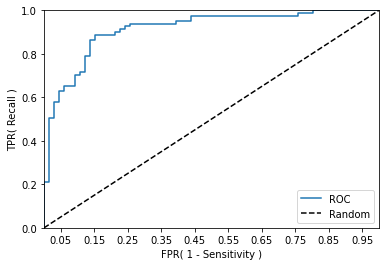

In [ ]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1) # 임곗값에 따른 FPR, TPR 값을 반환 받음. 

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_valid, predict_prob)

ROC Curve가 좌측 상단에 붙은것으로 보이기 때문에 모델이 적합하다고 해석된다.

https://angeloyeo.github.io/2020/08/05/ROC.html

## Interpretation

In [ ]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  532
Model:                          Logit   Df Residuals:                      521
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.5000
Time:                        13:53:24   Log-Likelihood:                -184.38
converged:                       True   LL-Null:                       -368.75
Covariance Type:            nonrobust   LLR p-value:                 4.163e-73
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6971      0.736      0.947      0.343      -0.745       2.139
Cholesterol          -0.0046      0.001     -3.434      0.001      -0.007      -0.002
Oldpeak               0.3554      0.151      2.360      0.018       0.060       0.651
Sex_M                 1.2687      0.345      3.679      0.000       0.593       1.945
ChestPainType_ATA    -1.5745      0.401     -3.928      0.000      -2.360      -0.789
ChestPainType_NAP    -1.6143      0.345     -4.684      0.000      -2.290      -0.939
ChestPainType_TA     -1.0523      0.498     -2.112      0.035      -2.029      -0.076
FastingBS_Low        -0.9801      0.338     -2.898      0.004      -1.643      -0.317
ExerciseAngina_Y      1.0857      0.299      3.637      0.000       0.501       1.671
ST_Slope_Flat         1.2611      0.556      2.269      0.023       0.172       2.350
ST_Slope_Up          -1.1410      0.579     -1.970      0.049      -2.276      -0.006
=====================================================================================
"""

Logistic Regression model의 요약은 위와같다.

총 532개 observation, 잔차는 총 값이 521이였으며 모델의 Dataframe은 10가지 변수들로 이루어져 있다

이때 10가지 변수들의 경우 5개의 변수들을 전처리 과정에서 지웠기 때문에 지웠던 변수들을 나타내면

reference:(Sex = female, ChestPainType = ASY, FastingBS=High, ExerciseAngina= N,  ST_Slope=Down)

10개의 변수의  p-value가 모두 유의수준 0.05 이하이기 때문에 모두 고려한다.

Logit(HeartDisease=1,발병)=0.6971 -0.0046* Cholesterol +0.3554* Oldpeak+ 1.2687* Sex_M -1.5745* ChestPainType_ATA - 1.6143* ChestPainType_NAP -1.0523* ChestPainType_TA -0.9801* FastingBS_Low + 1.0857* ExerciseAngina_Y +1.2611 * ST_Slope_Flat -1.1410* ST_Slope_ Up

즉 콜레스테롤이 낮고, Oldpeak가 높으며 , 성별의 경우는 남성이고 타입이 ATA,NAP,TA가 아니고(즉 ASY 일경우) FastingBS가 높고 ExcerciseAngina가 있고 ST_Slope가 Flat하지 않고 UP일 경우 HeartDisease가 발병한다고 해석할 수 있었다. 

In [ ]:
# Odds ratio
import numpy as np
np.exp(model_sm.params) # reference: (Pclass = 1, Sex = Female)

const                2.007898
Cholesterol          0.995370
Oldpeak              1.426797
Sex_M                3.556270
ChestPainType_ATA    0.207112
ChestPainType_NAP    0.199020
ChestPainType_TA     0.349146
FastingBS_Low        0.375256
ExerciseAngina_Y     2.961615
ST_Slope_Flat        3.529233
ST_Slope_Up          0.319489
dtype: float64

reference:(Sex = female, ChestPainType = ASY, FastingBS=High, ExerciseAngina= N,  ST_Slope=Down) 임을 인지하고 odds ratio를 해석한다.

Numerical 변수인 Cholesterol과 Oldpeak의 경우 그 자체의 Odds수치가 각각 0.9953/1.4267 이고 나머지 변수들과 비교할 수 없다.

Sex_M의 경우 여성일때보다 Odds가 약 3.556배로 증가하였다. 즉 여성일 경우보다 발병하지 않을 확률 대비 발병할 확률이 3.556배로 증가했다것이다.(Odds가 255.6% 증가하였다)

ChestPainType_ATA의 경우 ChestPainType이 ASY일 경우보다 Odds가 0.2071배로 증가 하였다. 즉 ASY일 경우보다 발병하지 않을 확률 대비 발병할 확률이 0.2071배로 증가했다것이다.(Odds가 79.83% 감소하였다)

ChestPainType이 NAP일경우 ASY일 경우보다 Odds가 0.1990배(Odds가 80.1% 감소)

ChestPainType이 TA일경우 ASY일 경우보다 Odds가 0.3491배(Odds가 65.09% 감소)

FastingBs_Low의 경우 High일때보다 Odds가 약 0.3752배로 증가하였다. 즉 High일 경우보다 발병하지 않을 확률 대비 발병할 확률이 0.3752배로 증가했다것이다.(Odds가 62.48% 감소하였다)

ExerciseAngina_Y의 경우 ExcerciseAngina가 NO(없을때)일때보다 Odds가 약 2.961배로 증가하였다. 즉 ExerciseAngina가 없을때와 비교하여 발병하지 않을 확률 대비 발병할 확률이 2.961배로 증가했다것이다.(Odds가 196.1% 증가하였다)

ST_Slope_Flat의 경우 Down일때보다 Odds가 약 3.529배로 증가하였다. 즉 Down일 경우보다 발병하지 않을 확률 대비 발병할 확률이 3.529배로 증가했다것이다.(Odds가 252.9% 증가하였다)

ST_Slope가 Up일경우 Down일 경우보다 Odds가 0.3194배(Odds가 68.06% 감소)


## Appendices

SKlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e9)
model.fit(x_train, y_train)

In [ ]:
print(model.intercept_) 
print(model.coef_)

## reference: (Pclass=1, Sex=Female)

In [ ]:
print(model.predict_proba(x_train)[:5]) # 0=정상, 1=심장병 : 각 관측치별..[0(정상)일 확률, 1(심장병)일 확률]

다음과 같은 코드로 각 관측치별 정상일 확률과 심장병일 확률을 파악할 수 있다. 해당 모델에서는 0.5를 기준으로 낮으면 정상 높으면 심장병으로 파악할 수 있다. 

K-fold CV

https://blog.naver.com/PostView.naver?blogId=sjy5448&logNo=222427780700&parentCategoryNo=153&categoryNo=&viewDate=&isShowPopularPosts=true&from=search

In [ ]:
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# kfold = KFold(n_splits=10, shuffle=True, random_state=312) # K-Fold 객체 생성
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=312) # stratified K-Fold 객체 생성

# sklearn 관련 (cross-validation, measure) 추가 학습 링크:
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [ ]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
penalty: 'l1', 'l2', 'elasticnet', 'none' (default: l2)
fit_intercept: True, False (default: True)
'''
from sklearn.linear_model import LogisticRegression
model_cv = LogisticRegression()

In [ ]:
# Stratified k-fold CV
# Accuracy 기준: cross_val_score(model, featrues, target, cross validation)
scores = cross_validate(model_cv, train_features, train_target, cv=kfold, # (model, featrues, target, cross validation)
                        scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc']) 
                        # precision/recall macro/micro : https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
{k: np.mean(v) for k, v in scores.items()}

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model_cv, train_features, train_target, cv=kfold)